<a href="https://colab.research.google.com/github/Hinoto04/2021_PNUAC_AIData/blob/main/mlp_model_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape : ' + str(x_train.shape))
print('y_train sahpe : ' + str(y_train.shape))
print('x_test shape : ' + str(x_test.shape))
print('y_test shape : ' + str(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
x_train shape : (60000, 28, 28)
y_train sahpe : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


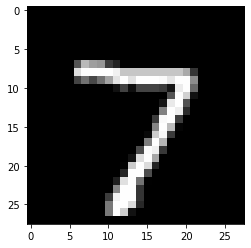

In [3]:
plt.imshow(x_test[0], cmap='gray')

In [5]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential([
                    Dense(64, input_dim=28*28, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(10, activation= 'softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
hist = model.fit(x_train, y_train,
                 validation_split = 0.2, #전체 훈련셋의 20%를 검증셋, 나머지를 훈련셋으로 해 테스트
                 batch_size=32,
                 epochs=100)

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3133 - accuracy: 0.9085 - val_loss: 0.1786 - val_accuracy: 0.9472
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1441 - accuracy: 0.9572 - val_loss: 0.1316 - val_accuracy: 0.9616
Epoch 3/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9683 - val_loss: 0.1168 - val_accuracy: 0.9653
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0848 - accuracy: 0.9736 - val_loss: 0.1164 - val_accuracy: 0.9643
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.1176 - val_accuracy: 0.9655
Epoch 6/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9822 - val_loss: 0.1099 - val_accuracy: 0.9714
Epoch 7/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.1208 - val_ac

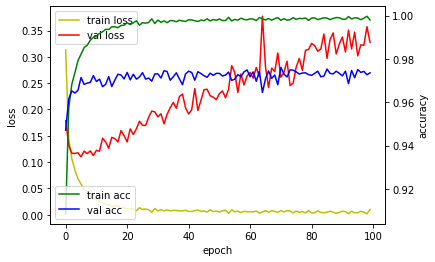

In [9]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'g', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
model = Sequential([
                    Dense(64, input_dim=28*28, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(10, activation= 'softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint("best_mode.h5",
                                      save_best_only=True,
                                      monitor="val_loss")
hist = model.fit(x_train, y_train,
                 validation_split=0.2,
                 batch_size=32,
                 epochs=20,
                 callbacks=[checkpoint_callback])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3158 - accuracy: 0.9093 - val_loss: 0.1942 - val_accuracy: 0.9421
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1484 - accuracy: 0.9557 - val_loss: 0.1389 - val_accuracy: 0.9587
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1056 - accuracy: 0.9685 - val_loss: 0.1203 - val_accuracy: 0.9657
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0830 - accuracy: 0.9753 - val_loss: 0.1016 - val_accuracy: 0.9693
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.1188 - val_accuracy: 0.9648
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0960 - val_accuracy: 0.9729
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.1006 - val_accuracy:

In [13]:
model = load_model('best_mode.h5')

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 0.0889 - accuracy: 0.9745
Test accuracy 0.9745000004768372
Test loss 0.08894908428192139


In [14]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', y_pred, fmt='%d')